In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader

from torchvision import datasets, transforms
import torch.nn.functional as F
from torch.autograd import Function
import matplotlib.pyplot as plt

In [127]:
from PIL import Image
from pylab import *
from resizeimage import resizeimage
import png
import os

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
class10=unpickle("cifar-10-batches-py/data_batch_4")

In [120]:
class10test=unpickle("cifar-10-batches-py/test_batch")

In [124]:
for i in range(10000):
    im = Image.fromarray(np.array(class10[b'data'][i].reshape((3,32*32)).T.reshape(32,32,3))).convert('L')
    cover=resizeimage.resize_cover(im, [28, 28])
    cover.save("mnist_png/training/10/"+str(class10[b'filenames'][i])[2:-1])

for i in range(0,10000):
    im = Image.fromarray(np.array(class10test[b'data'][i].reshape((3,32*32)).T.reshape(32,32,3))).convert('L')
    cover=resizeimage.resize_cover(im, [28, 28])
    cover.save("mnist_png/testing/10/"+str(class10test[b'filenames'][i])[2:-1])

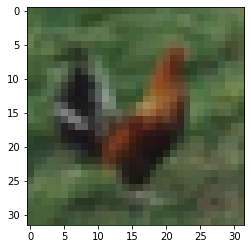

In [95]:
a=class10[b'data'][0].reshape((3,32*32))
plt.imshow(class10[b'data'][5].reshape((3,32*32)).T.reshape(32,32,3))

In [268]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
batch_size = 32
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, transform=transform), batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, download=True, transform=transform), batch_size=batch_size, shuffle=False)

In [419]:
root_dir="mnist_png"
transform2=transforms.Compose([transforms.Grayscale(1),transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

In [422]:
train_data=ImageFolder(root=os.path.join(root_dir,"training"),transform=transform2)
test_data=ImageFolder(root=os.path.join(root_dir,"testing"),transform=transform2)

In [423]:
len(train_data),len(test_data)

(70000, 20000)

In [424]:
train_data.classes,test_data.classes

(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'tout'],
 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'tout'])

In [145]:
def test(weights, test_loader):
    test_size = len(test_loader.dataset)
    correct = 0

    for batch_idx, (data, target) in enumerate(test_loader):
        data = data.view((-1, 28*28))
        outputs = torch.matmul(data, weights)
        softmax = F.softmax(outputs, dim=1)
        pred = softmax.argmax(dim=1, keepdim=True)
        n_correct = pred.eq(target.view_as(pred)).sum().item()
        correct += n_correct
    acc = correct / test_size
    print(" Accuracy on test set", acc)
    return

In [425]:
batch_size=50
train11_loader=torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test11_loader =torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)


tensor(10)


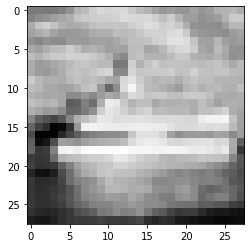

In [283]:

for i in train11_loader:
    plt.imshow(i[0][0][1],cmap='gray')
    print(i[1][0])
    break
#int(train_data.classes[i[1][0]])


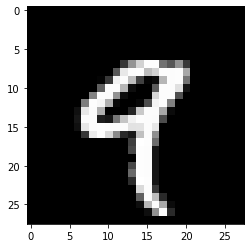

In [275]:
plt.imshow(i[0][0][2],cmap='gray')

In [286]:
count_dict={0:0, 1:0, 2:0 ,3:0, 4:0, 5:0, 6:0,7:0,8:0,9:0,10:0}

In [291]:
def countDict(data,count_dict):
    for d in data:
        x,y=d
        for i in y:
            count_dict[int(i)]+=1
        break
        
        

In [292]:
countDict(train11_loader,count_dict)
count_dict

{0: 3, 1: 4, 2: 4, 3: 3, 4: 4, 5: 3, 6: 9, 7: 8, 8: 2, 9: 4, 10: 6}

In [295]:
for i in count_dict:
    print(f"{i}:{count_dict[i]}")

0:3
1:4
2:4
3:3
4:4
5:3
6:9
7:8
8:2
9:4
10:6


[2, 2, 2]

In [471]:
class RN(torch.nn.Module):
    def __init__(self,nbHiddenLayers,nbNeuronsPerLayer,n_in=28*28,n_out=11,):
        super().__init__()
        #fully connected layer
        #self.fc1=torch.nn.Linear(28*28,nbNeuronsPerLayer)
        self.dim_in = n_in
        self.dim_out = n_out
        self.n_hidden_layers=nbHiddenLayers
        self.nbNPerLayer=nbNeuronsPerLayer
        #self.fc=None
        if(self.n_hidden_layers > 0):
            self.fc1 = torch.nn.Linear(self.dim_in,self.nbNPerLayer,bias=True)# In -> first hidden
             # In -> first hidden
             # Hidden -> hidden
            self.fc2=torch.nn.Linear(self.nbNPerLayer,self.nbNPerLayer,bias=True)
            self.fc3=torch.nn.Linear(self.nbNPerLayer,self.nbNPerLayer,bias=True)
            self.fc4=torch.nn.Linear(self.nbNPerLayer,self.dim_out,bias=True) # -> last hidden -> out
        else:
            self.fc1 = [torch.nn.Linear(self.dim_in,self.dim_out,bias=True)] # Single-layer perceptron
    
    def forward(self, x):
        fc=[self.fc1,self.fc2,self.fc3,self.fc4]
        for i in range(self.n_hidden_layers):
            x=F.relu(fc[i](x))
        x=fc[-1](x)
        #return F.log_softmax(x,dim=1)
        return F.softmax(x,dim=1)

In [472]:

nbHiddenLayers = 2
nbNeuronsPerLayer = 100
myNN=RN(nbHiddenLayers,nbNeuronsPerLayer)

In [473]:
X=torch.rand((28,28))
output=myNN.forward(X.view(-1,28*28))
print(myNN)

RN(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=11, bias=True)
)


In [474]:
import torch.optim
optimizer=torch.optim.Adam(myNN.parameters(),lr=1e-3) #lr : learning rate

In [475]:
for i in range(3):
    for data in train11_loader:
        x,y=data
        #print(y[0]) donne la classe x[0]!=[1,28,28] mais [3,28,28] 3 fois la meme image
        myNN.zero_grad() #
        output=myNN(x.view(-1,28*28))
        loss=F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(-0.9796, grad_fn=<NllLossBackward>)
tensor(-0.8981, grad_fn=<NllLossBackward>)
tensor(-0.9595, grad_fn=<NllLossBackward>)


In [476]:
correct =0
total=0
with torch.no_grad():
    for data in train11_loader:
        x,y=data
        output=myNN(x.view(-1,28*28))
        for i,img in enumerate(output):
            if(torch.argmax(img)==y[i]):
                correct+=1
            total+=1
print("Accuracy : ",correct/total)

Accuracy :  0.9611857142857143


In [477]:
correct =0
total=0
with torch.no_grad():
    for data in test11_loader:
        x,y=data
        output=myNN(x.view(-1,28*28))
        for i,img in enumerate(output):
            if(torch.argmax(img)==y[i]):
                correct+=1
            total+=1
print("Accuracy : ",correct/total)

Accuracy :  0.97335


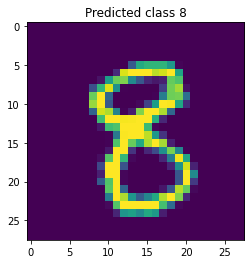

In [478]:
plt.imshow(x[49].view(28,28))
plt.title("Predicted class {}".format(y[49]))
plt.show()

In [479]:
torch.argmax(myNN(x[1].view(-1,28*28))[0])

tensor(2)

In [482]:
myNN(x[1].view(-1,28*28))[0]

tensor([3.1124e-29, 1.2090e-23, 1.0000e+00, 3.5779e-21, 0.0000e+00, 2.1288e-32,
        5.9045e-29, 3.3963e-24, 6.2708e-23, 1.7128e-40, 4.1297e-24],
       grad_fn=<SelectBackward>)

In [334]:
np.array(Image.open("mnist_png/testing/tout/accentor_s_000105.png")).shape

(28, 28)

In [399]:
for i in test11_loader:
    
    i=i[0][1][0:1]
    break

In [400]:
for i in test11_loader:
    print(i[0].shape)
    break

torch.Size([50, 3, 28, 28])
